In [ ]:
from skimage import io
from skimage.transform import resize
import math 
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from os import listdir, path, makedirs
import cv2 
import os

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# mount the drive to get data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def load_images_from_folder(folder,label):
    images = []
    labels = []
    imageNames = []
    for filename in os.listdir(folder):
        if '.jpg' in filename or '.JPG' in filename:
            # img = io.imread(os.path.join(folder,filename)) /255 
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (100,100), interpolation = cv2.INTER_AREA)
            img = img/255
            if img is not None:
                images.append(img)
                labels.append(label)
                imageNames.append(filename)
    return np.array(images),np.array(labels),imageNames

In [ ]:
data_dir = '/content/gdrive/MyDrive/dataset2'

In [ ]:
folder_names = [f for f in listdir(data_dir)]

In [ ]:
count_img = 0
for folder in folder_names:
    imgs = [img for img in listdir(path.join(data_dir, folder))]
    count_img += len(imgs)
    print(folder, len(imgs))

bonsai 128
Motorbikes 798
car_side 123
airplanes 800
sunflower 85
laptop 81
starfish 86
watch 239
Leopards 200
brain 98


In [ ]:
Airplanes,Airplane_labels,imagenames0         = load_images_from_folder(path.join(data_dir, 'airplanes'),'Airplane')
Bonsai,Bonsai_labels,imagenames1              = load_images_from_folder(path.join(data_dir, 'bonsai'),'Bonsai')
Brain,Brain_labels,imagenames2                = load_images_from_folder(path.join(data_dir, 'brain'),'Brain')
Car_side,Car_side_labels,imagenames3          = load_images_from_folder(path.join(data_dir, 'car_side'),'Car-side')
Laptop,Laptop_labels,imagenames4              = load_images_from_folder(path.join(data_dir, 'laptop'),'Laptop')
Leopards,Leopards_labels,imagenames5          = load_images_from_folder(path.join(data_dir, 'Leopards'),'Leopards')
Motorbikes,Motorbike_labels,imagenames6       = load_images_from_folder(path.join(data_dir, 'Motorbikes'),'Motorbike')
Starfish,Starfish_labels,imagenames7          = load_images_from_folder(path.join(data_dir, 'starfish'),'Starfish')
Sunflower,Sunflower_labels,imagenames8        = load_images_from_folder(path.join(data_dir, 'sunflower'),'Sunflower')
Watch,Watch_labels,imagenames9                = load_images_from_folder(path.join(data_dir, 'watch'),'Watch')

In [ ]:
X = []
Y = []
imageNames = [] 


for i in range(len(Airplanes)):
    X.append(Airplanes[i])
    Y.append(Airplane_labels[i])
    imageNames.append('Airplanes - ' + imagenames0[i])

for i in range(len(Bonsai)):
    X.append(Bonsai[i])
    Y.append(Bonsai_labels[i])
    imageNames.append('Bonsai - ' + imagenames1[i])

for i in range(len(Brain)):
    X.append(Brain[i])
    Y.append(Brain_labels[i])
    imageNames.append('Brain - ' + imagenames2[i])

for i in range(len(Car_side)):
    X.append(Car_side[i])
    Y.append(Car_side_labels[i])
    imageNames.append('Car_side - ' + imagenames3[i])

for i in range(len(Laptop)):
    X.append(Laptop[i])
    Y.append(Laptop_labels[i])
    imageNames.append('Laptop - ' + imagenames4[i])

for i in range(len(Leopards)):
    X.append(Leopards[i])
    Y.append(Leopards_labels[i])
    imageNames.append('Leopards - ' + imagenames5[i])

for i in range(len(Motorbikes)):
    X.append(Motorbikes[i])
    Y.append(Motorbike_labels[i])
    imageNames.append('Motorbike - ' + imagenames6[i])

for i in range(len(Starfish)):
    X.append(Starfish[i])
    Y.append(Starfish_labels[i])
    imageNames.append('Starfish - ' + imagenames7[i])

for i in range(len(Sunflower)):
    X.append(Sunflower[i])
    Y.append(Sunflower_labels[i])
    imageNames.append('Sunflower - ' + imagenames8[i])

for i in range(len(Watch)):
    X.append(Watch[i])
    Y.append(Watch_labels[i])
    imageNames.append('Watch - ' + imagenames9[i])


In [ ]:
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 3)

temp = list(zip(X, Y,imageNames))
random.shuffle(temp)
X, Y,imageNames = zip(*temp)
del temp
X = np.array(X,dtype=float)
Y = np.array(Y)

In [ ]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([5, 9, 6, ..., 0, 6, 6])

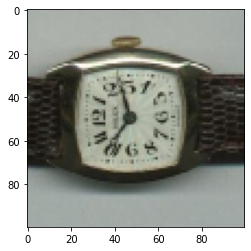

Watch
Watch - image_0063.jpg


In [ ]:
plt.imshow(X[10])
plt.show()

print(Y[10])
print(imageNames[10])

In [ ]:
X.shape

(2638, 100, 100, 3)

In [ ]:
Y.shape

(2638,)

In [ ]:
len(imageNames)

2638

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_integer_encoded, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)

# Bulid The Model 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
def buildModel():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.8))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = buildModel()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 64)      

In [ ]:
call = [keras.callbacks.ModelCheckpoint('/content/Caltech_Model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')]
history = model.fit(X_train, y_train, epochs = 15, validation_data= (X_val, y_val), batch_size= 64,shuffle=True ,callbacks = call)

Epoch 1/15
29/29 [==============================] - 4s 112ms/step - loss: 2.1496 - accuracy: 0.2858 - val_loss: 1.6805 - val_accuracy: 0.5668

Epoch 00001: val_accuracy improved from -inf to 0.56683, saving model to /content/Caltech_Model.h5
Epoch 2/15
29/29 [==============================] - 2s 86ms/step - loss: 1.2977 - accuracy: 0.6001 - val_loss: 1.1186 - val_accuracy: 0.5743

Epoch 00002: val_accuracy improved from 0.56683 to 0.57426, saving model to /content/Caltech_Model.h5
Epoch 3/15
29/29 [==============================] - 3s 87ms/step - loss: 0.6438 - accuracy: 0.7912 - val_loss: 0.4955 - val_accuracy: 0.8342

Epoch 00003: val_accuracy improved from 0.57426 to 0.83416, saving model to /content/Caltech_Model.h5
Epoch 4/15
29/29 [==============================] - 2s 86ms/step - loss: 0.4549 - accuracy: 0.8570 - val_loss: 0.4392 - val_accuracy: 0.8589

Epoch 00004: val_accuracy improved from 0.83416 to 0.85891, saving model to /content/Caltech_Model.h5
Epoch 5/15
29/29 [========

In [ ]:
results = model.evaluate(X_test, y_test)

m2 = keras.models.load_model('Caltech_Model.h5')

m2.evaluate(X_test, y_test)

13/13 [==============================] - 1s 19ms/step - loss: 0.3001 - accuracy: 0.9242


[0.3001399636268616, 0.9242424368858337]

In [ ]:
model.save("my_model_caltech")

INFO:tensorflow:Assets written to: my_model_caltech/assets


In [ ]:
m = keras.models.load_model('my_model_caltech')

In [ ]:
!zip -r /content/my_model.zip /content/my_model_caltech

  adding: content/my_model_caltech/ (stored 0%)
  adding: content/my_model_caltech/assets/ (stored 0%)
  adding: content/my_model_caltech/variables/ (stored 0%)
  adding: content/my_model_caltech/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/my_model_caltech/variables/variables.index (deflated 68%)
  adding: content/my_model_caltech/saved_model.pb (deflated 89%)
  adding: content/my_model_caltech/keras_metadata.pb (deflated 92%)


In [ ]:
predected_labels = m.predict_classes(np.array(X))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions_test = label_encoder.inverse_transform(predected_labels)

In [ ]:
data = {'Image Name':imageNames,'Real lables':Y,'Predected Labels':predictions_test}

df = pd.DataFrame(data)

In [ ]:
df

,Image Name,Real lables,Predected Labels
0,Motorbike - image_0223.jpg,Motorbike,Motorbike
1,Airplanes - image_0109.jpg,Airplane,Airplane
2,Airplanes - image_0153.jpg,Airplane,Airplane
3,Brain - image_0025.jpg,Brain,Brain
4,Sunflower - image_0024.jpg,Sunflower,Sunflower
...,...,...,...
2633,Airplanes - image_0028.jpg,Airplane,Airplane
2634,Airplanes - image_0116.jpg,Airplane,Airplane
2635,Starfish - image_0047.jpg,Starfish,Starfish
2636,Motorbike - image_0062.jpg,Motorbike,Motorbike


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

labels = ['bonsai','Motorbikes','car_side','airplanes','sunflower','laptop','starfish','watch','Leopards','brain']

callsReport = classification_report(Y_integer_encoded, predected_labels, target_names=labels)

In [ ]:
print(callsReport)

              precision    recall  f1-score   support

      bonsai       0.99      1.00      0.99       800
  Motorbikes       0.98      0.95      0.96       128
    car_side       0.97      0.90      0.93        98
   airplanes       0.96      0.98      0.97       123
   sunflower       0.92      0.94      0.93        81
      laptop       0.98      0.98      0.98       200
    starfish       1.00      0.99      1.00       798
       watch       0.91      0.98      0.94        86
    Leopards       0.98      0.95      0.96        85
       brain       0.96      0.97      0.97       239

    accuracy                           0.98      2638
   macro avg       0.96      0.96      0.96      2638
weighted avg       0.98      0.98      0.98      2638



In [ ]:
df.to_csv('Predections_Keras_Caltech.csv')

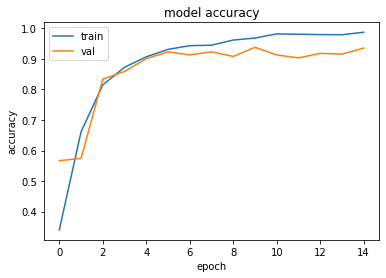

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

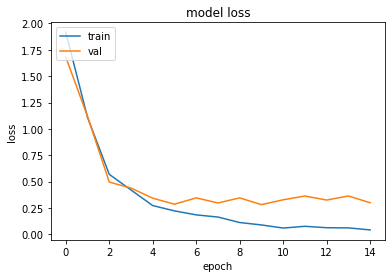

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Alex net

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

# https://github.com/eweill/keras-deepcv/blob/master/models/classification/alexnet.py

def alexnet_model(img_shape=(100, 100, 3), n_classes=10, l2_reg=0.,
	weights=None):

	# Initialize model
	alexnet = Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
		padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(512, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 4
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 5
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 6
	alexnet.add(Flatten())
	alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 7
	alexnet.add(Dense(4096))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 8
	alexnet.add(Dense(n_classes))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('softmax'))

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet

In [ ]:
model = alexnet_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 96)      34944     
_________________________________________________________________
batch_normalization_16 (Batc (None, 100, 100, 96)      384       
_________________________________________________________________
activation_16 (Activation)   (None, 100, 100, 96)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 256)       614656    
_________________________________________________________________
batch_normalization_17 (Batc (None, 50, 50, 256)       1024      
_________________________________________________________________
activation_17 (Activation)   (None, 50, 50, 256)      

In [ ]:
history = model.fit(X_train, y_train, epochs = 15, validation_data= (X_val, y_val), batch_size= 64,shuffle=True )

Epoch 1/15
29/29 [==============================] - 69s 583ms/step - loss: 1.5966 - accuracy: 0.5424 - val_loss: 11.5284 - val_accuracy: 0.3391
Epoch 2/15
29/29 [==============================] - 11s 379ms/step - loss: 0.9934 - accuracy: 0.8381 - val_loss: 2.7126 - val_accuracy: 0.3787
Epoch 3/15
29/29 [==============================] - 11s 387ms/step - loss: 0.7925 - accuracy: 0.9061 - val_loss: 1.7452 - val_accuracy: 0.5223
Epoch 4/15
29/29 [==============================] - 11s 395ms/step - loss: 0.6803 - accuracy: 0.9511 - val_loss: 1.9973 - val_accuracy: 0.2723
Epoch 5/15
29/29 [==============================] - 12s 406ms/step - loss: 0.6313 - accuracy: 0.9534 - val_loss: 1.9646 - val_accuracy: 0.2970
Epoch 6/15
29/29 [==============================] - 12s 403ms/step - loss: 0.5255 - accuracy: 0.9792 - val_loss: 1.7470 - val_accuracy: 0.4134
Epoch 7/15
29/29 [==============================] - 12s 397ms/step - loss: 0.4960 - accuracy: 0.9840 - val_loss: 1.8458 - val_accuracy: 0.391

In [ ]:
results = model.evaluate(X_test, y_test)

13/13 [==============================] - 3s 105ms/step - loss: 0.5248 - accuracy: 0.9419


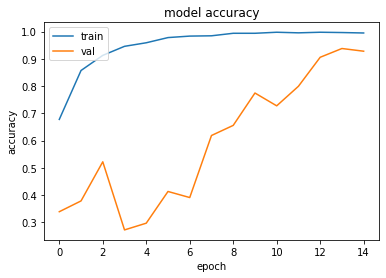

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

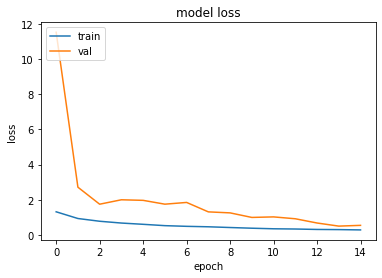

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()